In [1]:
import os
import pymysql
import pandas as pd
import numpy as np
from dotenv import load_dotenv, find_dotenv

In [2]:
from customerclustering.db_connection import Db
from customerclustering.get_training_data import *
from customerclustering.baseline import *
from customerclustering.trainer_v0 import *

# Model Predict

In [3]:
import joblib
import pandas as pd

baseline = joblib.load("../models/model_v0_withoutpca.joblib")

training_data_df = pd.read_csv("../raw_data/training_data_2.csv", index_col=[0])

c = baseline.predict(training_data_df)

In [4]:
training_data_df_labels = training_data_df.copy()
training_data_df_labels['col_labels'] = c

In [5]:
individual_user = baseline.predict(training_data_df.iloc[:1, :])

In [6]:
individual_user

array([0], dtype=int32)

In [7]:
# training_data_df_labels.to_csv('../raw_data/df_with_labels2.csv')

In [8]:
cluster_df = pd.read_csv("../raw_data/withlabel_tsne.csv",index_col=[0])
cluster_df.label.unique()

array([ 2.,  1.,  5.,  0.,  3.,  4., nan])

In [99]:
cluster_df = cluster_df.copy()
import math

def cluster_transform(x):
    if math.isnan(x) is True:
        return x
    else:
        return f"cluster {str(int(x)+1)}"
    
cluster_df['label'] = cluster_df['label'].apply(cluster_transform)
cluster_df['label'].unique()


array(['cluster 3', 'cluster 2', 'cluster 6', 'cluster 1', 'cluster 4',
       'cluster 5', nan], dtype=object)

In [100]:
cluster_df

,Product,Status,userID,stripeCustID,num_subs,account_age,pProfileID,typeOfPractice,located,specialities,...,event_cpd_day_diff,doc_in_activation,activated,plan_type,subscribe_days,GoalsPerYear,ratioOfAchivedGoals,metaGoalTitle,label,count
0,Ausmed Subscription,incomplete_expired,6037d38d-d098-4f68-be8c-49b7131b8116,cus_CVloz8uJiXpqfF,10,1620.0,41b3e81d-ccdd-40c8-b268-874344b0a1bf,hospital,remote area,"Rehabilitation,Aged care ,Medical",...,117.197044,10,1,quarterly,1552,5.0,0.400000,"To gain confidence ,skills and knowledge as a ...",cluster 3,1
1,Ausmed Subscription,canceled,62d1fe96-34f6-4992-9f15-b240f07770d8,cus_EoCO9ITZcMHmkA,9,1240.0,71a06b47-4762-49d2-b5fd-161c7ce6e1cd,hospital,large rural centre,Addiction and Substance Abuse,...,164.064103,2,1,quarterly,0,1.5,0.000000,Do my best Gehenna d f r dwa wa daw daw,cluster 3,1
2,Ausmed Subscription,canceled,6e6b0e01-4a29-4724-a781-5d6a0d72a213,cus_BVqWWYIZ4tLhQr,6,2129.0,0cccdf89-bae9-4d06-8a40-81a6c7b3b7ce,GP Surgery,metropolitan centre,"Immunisation,Chronic Illness",...,149.362205,4,1,monthly,193,2.0,0.000000,Covid vaccination and wound management. \nMy r...,cluster 2,1
3,Ausmed Subscription,active,33d2881f-8bc6-4b98-bafe-bfd20b141ee2,cus_AVUDPqhuPS9HRy,5,1952.0,72593341-edad-404e-9a92-bf7f576e5207,hospital,metropolitan centre,aged care; wound care and the continuity of he...,...,76.311787,2,1,quarterly,322,1.0,0.000000,By the end of 2021 I would like to expand my k...,cluster 6,1
4,Ausmed Subscription,incomplete_expired,5f048ee3-4ea0-41e1-b859-c1cd9c95d80b,cus_F71ikWaGTyumEe,5,1190.0,752db353-5793-4636-acd7-fe3205291c91,Unemployed.,small rural centre,NaN,...,8.618321,4,1,quarterly,80,2.0,0.000000,"Study, learn and retain knowledge. Do online s...",cluster 3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,Ausmed Subscription,canceled,ffcfb50b-fbbb-492a-bfd4-17ee764065a4,cus_FLYFqsbbJnBX9M,1,1151.0,e5faf419-fe5f-4b47-9402-4c391242d5bf,hospital,metropolitan centre,"Emergency,outpatients ,Trauma,Orthopaedics",...,118.892857,1,0,quarterly,2,3.0,0.333333,"Cardiovascular health, treatment, assessment r...",NaN,1
7477,Ausmed Subscription,active,ffde3d2e-1f3e-4dfa-a166-22d1c7950b4c,cus_FN2RW4QePZASHr,1,1147.0,9605c9d3-1798-45d2-ba95-ea6d7fde2536,education provider,large rural centre,Residential Aged Care,...,133.187500,3,1,quarterly,612,1.0,0.000000,To update current wound management\nTo underst...,NaN,1
7478,Ausmed Subscription,canceled,ffded699-79d7-4e0d-82d9-c30117a0ad1b,cus_BrhtlUGppH8E2Q,1,1900.0,3d56eef4-b1c4-42ed-a401-8f9a38435da7,community,metropolitan centre,"Wound care,Palliative care",...,122.828571,4,1,quarterly,6,1.0,0.000000,To continually educate myself regarding new wo...,NaN,1
7480,Ausmed Subscription Monthly,canceled,fff566df-0bfd-4d57-9aff-081a6e66866c,cus_Bj6lmVhksR1pxP,1,1750.0,c64bea47-d137-45ad-a656-cfdb7c2d6cc4,hospital,metropolitan centre,Extended Day Surgery,...,127.921053,4,1,monthly,92,3.0,0.000000,I would like to be competent in IV Cannulation...,NaN,1


In [9]:
import io
buffer = io.StringIO()
cluster_df.info(buf=buffer)
lines = buffer.getvalue().splitlines()
column_df = (pd.DataFrame([x.split() for x in lines[6:-2]], columns=lines[3].split())
       .drop('Count',axis=1)
       .rename(columns={'Non-Null':'Non-Null Count'}))
column_df.head()

,#,Column,Non-Null Count,Dtype
0,1,Status,7128,object
1,2,userID,7128,object
2,3,stripeCustID,7128,object
3,4,num_subs,7128,int64
4,5,account_age,6433,float64


In [20]:
#categorical data only

cat_columns = column_df[column_df['Dtype']=='object'].reset_index().Column
num_columns = column_df[column_df['Dtype']!='object'].reset_index().Column

# Features Categorisation

## All features

In [11]:
# import io
# buffer = io.StringIO()
# training_data_df.info(buf=buffer)
# lines = buffer.getvalue().splitlines()
# column_df = (pd.DataFrame([x.split() for x in lines[6:-2]], columns=lines[3].split())
#        .drop('Count',axis=1)
#        .rename(columns={'Non-Null':'Non-Null Count'}))

# cat_columns = column_df[column_df['Dtype']=='object'].reset_index().Column
# non_cat_columns = column_df[column_df['Dtype']!='object'].reset_index().Column

In [12]:
baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  Index(['num_subs', 'account_age', 'hasPracticeRecord', 'docPerYear',
       'docOnAusmedPerYear', 'minPerYear', 'minOnAusmedPerYear',
       'learnFromAusmedRatio_num', 'learnFromAusmedRat...
                                                                                              ['canceled',
                                                                                               'incomplete_expired',
                                                                                               'past_due',
                                                                                               'trialing',
                                                                                               'active'],
                                                                                              ['never',
                                                                                               'sometimes',
                                                                                               'usually',
                                                                                               'always'],
                                                                                              ['monthly',
                                                                                               'quarterly',
                                                                                               'annually']],
                                                                                  encoded_missing_value=-1,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['located', 'Status',
                                                   'access', 'plan_type'])])),
                ('minibatchkmeans', MiniBatchKMeans(n_clusters=4))])

In [13]:
num_features = baseline[0].transformers[0][2]
cat_features = baseline[0].transformers[1][2]

### Loop for k mean calculation

In [16]:
num_features_df = cluster_df[num_columns]
num_features_df['label'] = cluster_df['label']

cat_features_df = cluster_df[cat_columns]
cat_features_df['label'] = cluster_df['label']

#calculate and consolidate all kmeans in one dataframe
num_kmean_df = num_features_df.groupby('label').mean().transpose()
cat_kmean_df = cat_features_df.groupby('label')[cat_columns].agg(pd.Series.mode).transpose()
kmean_df = num_kmean_df.append(cat_kmean_df)
kmean_df.columns= ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']
kmean_df.head()

/var/folders/t8/6sllmnn55m57p9d8z7w2ssrh0000gn/T/ipykernel_8527/3733281666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features_df['label'] = cluster_df['label']
/var/folders/t8/6sllmnn55m57p9d8z7w2ssrh0000gn/T/ipykernel_8527/3733281666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features_df['label'] = cluster_df['label']
/var/folders/t8/6sllmnn55m57p9d8z7w2ssrh0000gn/T/ipykernel_8527/3733281666.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pand

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
num_subs,1.118302,1.181669,1.132415,1.071312,1.125461,1.157514
account_age,1459.35852,1479.809353,1466.911551,1447.827063,1433.788732,1450.595745
hasPracticeRecord,0.901879,0.903437,0.890953,0.917801,0.889299,0.895954
docPerYear,1.506535,1.522668,1.529871,1.515458,1.519267,1.546041
docOnAusmedPerYear,0.825353,0.87575,0.861542,0.802124,0.819313,0.888378


In [103]:
# if 'account_age' in list(num_columns):
#     print ("true")
num_columns

0                     num_subs
1                  account_age
2            hasPracticeRecord
3                   docPerYear
4           docOnAusmedPerYear
5                   minPerYear
6           minOnAusmedPerYear
7     learnFromAusmedRatio_num
8     learnFromAusmedRatio_min
9                    numQueued
10       numCompletedFromQueue
11                   minQueued
12       minCompletedFromQueue
13       RatioOfCompletion_num
14       RatioOfCompletion_min
15          event_cpd_day_diff
16           doc_in_activation
17                   activated
18              subscribe_days
19                GoalsPerYear
20         ratioOfAchivedGoals
21                       label
Name: Column, dtype: object

In [116]:
def clusters_one_feature(feature): 
    #viz for num features using boxplot
    if feature in list(num_columns):
        viz = sns.boxplot(x = 'label', y = feature, hue = 'label', data = cluster_df, palette='bright'\
                 ,dodge = True)
        
        return viz
    
    #viz for cat features using heatmap
    else:
        cluster_df['count'] = 1
        heat_df = pd.pivot_table(cluster_df, values='count', index=[feature],
                            columns=['label'], aggfunc=np.sum, fill_value=0)

        for col in heat_df.columns:
            total = heat_df[col].sum()
            heat_df[col] = round(heat_df[col]/total,2)
        viz = sns.heatmap(heat_df, annot = True)

        return viz


<AxesSubplot:xlabel='account_age', ylabel='minPerYear'>

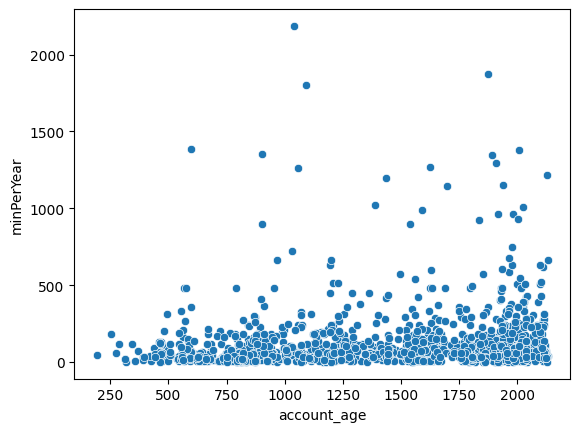

In [129]:
import seaborn as sns
from IPython.display import Markdown
import matplotlib.pyplot as plt

# cluster_df_new = cluster_df.drop(columns = ['Product', 'stripeCustID', 'userID','pProfileID',\
#                                             'focus', 'typeOfPractice', 'specialities', 'population',\
#                                             'country', 'metaGoalTitle'])


def cluster_two_feature(cluster,feature1,feature2):
    cluster_df_filtered = cluster_df[cluster_df['label']== cluster]
    viz1 = sns.scatterplot(data = cluster_df_filtered, x = feature1, y = feature2, palette='bright')
    return viz1
    
cluster_two_feature('cluster 1','account_age','minPerYear') 